## _Desafio 1 ML Sebastián Acevedo Espinoza_

##  1) ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

_Aprendizaje Supervisado:_

    Definición: El modelo se entrena con un conjunto de datos que incluye entradas y sus etiquetas de salida conocidas.

    Objetivo: Aprender una función que relacione entradas con salidas.

    Ejemplos típicos:

        Clasificación (e.g., spam vs. no spam).

        Regresión (e.g., predecir el precio de una casa).

Ejemplo: Si tienes un conjunto de correos electrónicos con etiquetas que indican si son "spam" o "no spam", puedes entrenar un modelo para clasificar nuevos correos.
_Aprendizaje No Supervisado:_

    Definición: El modelo se entrena solo con entradas, sin conocer las salidas o etiquetas.

    Objetivo: Descubrir estructuras o patrones ocultos en los datos.

    Ejemplos típicos:

        Agrupamiento o clustering (e.g., segmentación de clientes).

        Reducción de dimensionalidad (e.g., PCA).

Ejemplo: Si tienes datos de comportamiento de clientes pero sin saber a qué segmento pertenecen, puedes usar clustering para descubrir grupos similares.

## 2) En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

**Se utiliza aprendizaje supervisado**

Existe un conjunto de datos etiquetado: cada paciente tiene características (síntomas, antecedentes, etc.) y una etiqueta conocida (diagnóstico: enfermo o no enfermo).

El objetivo es construir un modelo que prediga una etiqueta binaria (enfermo / no enfermo), lo cual es un problema típico de clasificación supervisada.

## 3) ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

Es necesario dividir el conjunto de datos en dos subconjuntos al realizar modelamiento supervisado para poder evaluar adecuadamente el rendimiento del modelo y prevenir el sobreajuste (overfitting). Los dos subconjuntos son:

    Conjunto de entrenamiento (training set):

        Función: Se utiliza para entrenar el modelo, es decir, para ajustar sus parámetros internos a partir de los datos.

        Aquí el modelo aprende la relación entre las variables de entrada (features) y la variable objetivo (target).

    Conjunto de prueba (test set):

        Función: Se utiliza para evaluar el rendimiento del modelo una vez que ya ha sido entrenado.

        Este conjunto no ha sido visto por el modelo durante el entrenamiento, por lo que permite medir su capacidad de generalización a datos nuevos o no observados.

¿Por qué es importante esta separación?

    Si evaluamos el modelo usando los mismos datos con los que fue entrenado, podríamos obtener una falsa impresión de buen desempeño, ya que el modelo puede haber memorizado los datos en lugar de aprender patrones generales.

    Separar los datos asegura una evaluación imparcial de la capacidad del modelo para predecir correctamente con datos reales.

Opcionalmente, también se puede usar un conjunto de validación para ajustar hiperparámetros antes de la prueba final.

## 4) ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

Enfoque estadístico (clásico):

    Objetivo principal:
    Entender y explicar la relación entre variables. Se busca interpretar los coeficientes para hacer inferencias (por ejemplo, ¿cuánto cambia Y si X aumenta en 1?).

    Énfasis en:

        Supuestos del modelo (normalidad, homocedasticidad, independencia).

        Significancia estadística (p-valores, intervalos de confianza).

        Explicabilidad e interpretabilidad.

    Ejemplo: Se usa en estudios médicos o sociales para determinar si una variable influye significativamente en otra.

Enfoque de aprendizaje de máquinas:

    Objetivo principal:
    Predecir con la mayor precisión posible, aunque el modelo sea una "caja negra".

    Énfasis en:

        Rendimiento predictivo (usualmente medido con métricas como RMSE, MAE, etc.).

        Validación cruzada y ajuste de hiperparámetros.

        Generalización a datos nuevos.

    Ejemplo: Se usa para predecir precios de viviendas o demanda de productos, sin importar tanto la interpretación de los coeficientes.

## 5) Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).

a) Aprendizaje Supervisado (Clasificación)

Aplicación: Clasificación de tipos de cobertura terrestre (bosque, agua, urbano, cultivo) a partir de imágenes satelitales.
Se entrena un modelo para clasificar cada píxel o zona según sus características espectrales.

b) Aprendizaje Supervisado (Regresión)

Aplicación: Predicción de niveles de contaminación del aire (por ejemplo, concentración de PM2.5 o NO₂) en función de variables meteorológicas y datos de tráfico.
Se usa regresión para estimar valores numéricos continuos.

c) Aprendizaje No Supervisado (Clustering)

Aplicación: Agrupamiento de estaciones meteorológicas o zonas geográficas según patrones de clima o contaminación.
 Permite identificar regiones con comportamientos similares sin etiquetas previas.

d) Aprendizaje No Supervisado (Reducción de dimensionalidad)

Aplicación: Análisis de sensores multivariados (temperatura, humedad, gases) para detectar eventos anómalos o simplificar visualizaciones.
Se usan técnicas como PCA para reducir la complejidad de los datos y facilitar su análisis. 

# **Parte II**

## **Pregunta 6**

In [1]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.impute import SimpleImputer #para manejar los valores faltantes
from sklearn.linear_model import LinearRegression   # modelo de regresion lineal
from sklearn.preprocessing import OneHotEncoder #para codificar variables categoricas
from sklearn.compose import ColumnTransformer #para aplicar transformaciones a columnas especificas
from sklearn.pipeline import Pipeline #para crear un pipeline de transformacion y modelado
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #para evaluar el rendimiento del modelo


In [2]:
df=pd.read_excel("data-housing.xlsx") #cargamos el dataset
df

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,no,no,2
541,1767150,2400,3,1,1,no,no,no,0
542,1750000,3620,2,1,1,no,no,no,0
543,1750000,2910,3,1,1,no,no,no,0


In [3]:
# Separamos las variables independientes (X) y dependiente (y)
X = df.drop("price", axis=1)
y = df["price"]

In [4]:
# Identificamos las columnas categóricas
categorical_cols = ["guestroom", "hotwaterheating", "airconditioning"]

In [5]:
# Creamos un preprocesador para aplicar OneHotEncoding a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder="passthrough"  # Dejamos el resto de las columnas numéricas como están
)

In [6]:
# Creamos el pipeline de regresión lineal
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [7]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Entrenamos el modelo
model.fit(X_train, y_train)

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['guestroom',
                                                   'hotwaterheating',
                                                   'airconditioning'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Calculamos el R^2 en el conjunto de prueba
score = model.score(X_test, y_test)
score

0.6119372009958144

In [ ]:
# Haciendo las predicciones del modelo
y_pred = model.predict(X_test) #predicciones del modelo
mse = mean_squared_error(y_test, y_pred)# calculamos el error cuadratico medio
rmse = np.sqrt(mse) # calculamos la raiz del error cuadratico medio
mae = mean_absolute_error(y_test, y_pred)# calculamos el error absoluto medio

#imprimimos los resultados
print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"Mean Absolute Error: {round(mae,2)}")


Mean Squared Error: 1961490677565.63
Root Mean Squared Error: 1400532.28
Mean Absolute Error: 1017374.11


# **Pregunta 7**

Data Quality Report
--------------------

Valores Faltanes:
price              0
area               0
bedrooms           0
bathrooms          0
stories            0
guestroom          0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64

Estadísticas descriptivas:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

        guestroom  hotwaterheating  airconditioning 

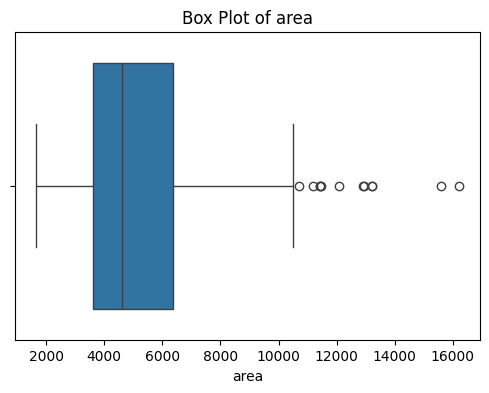

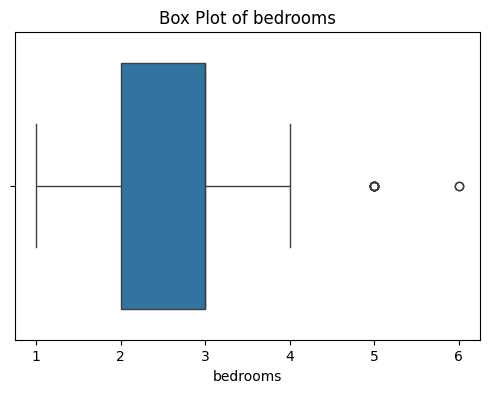

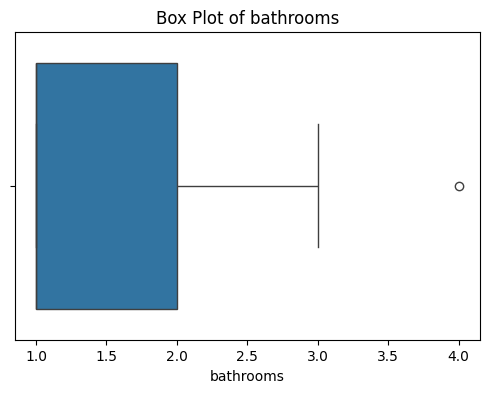

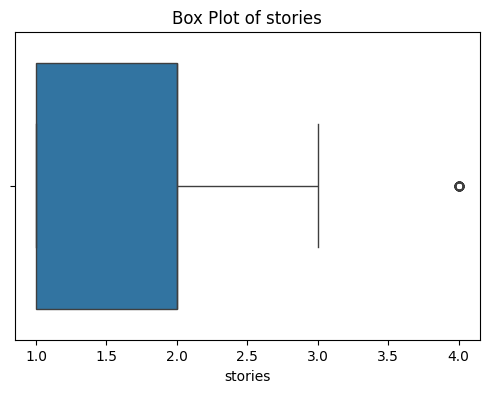

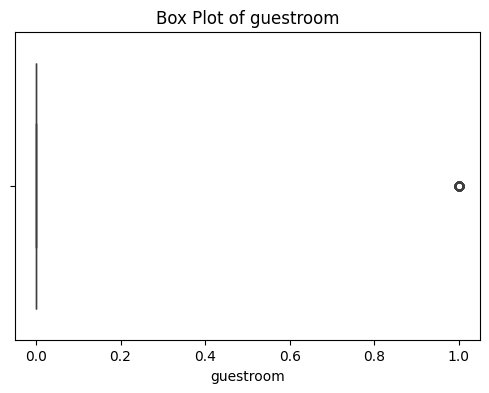

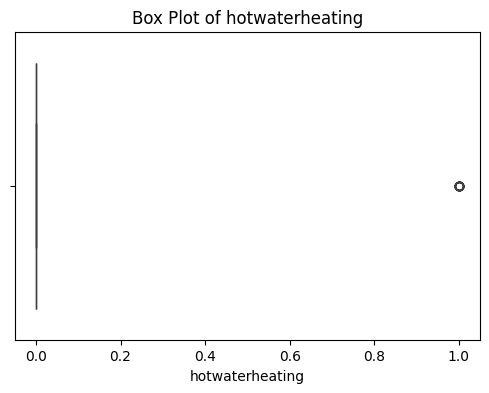

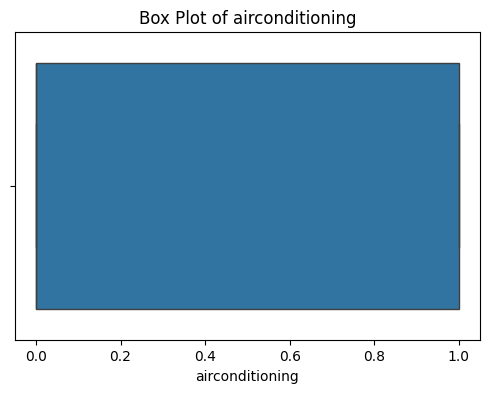

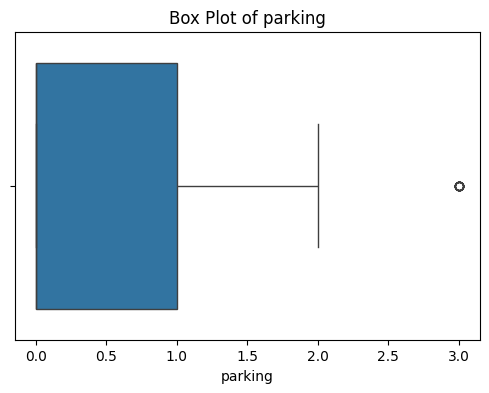


Valores extraños en características categóricas:

Matriz de Correlación:


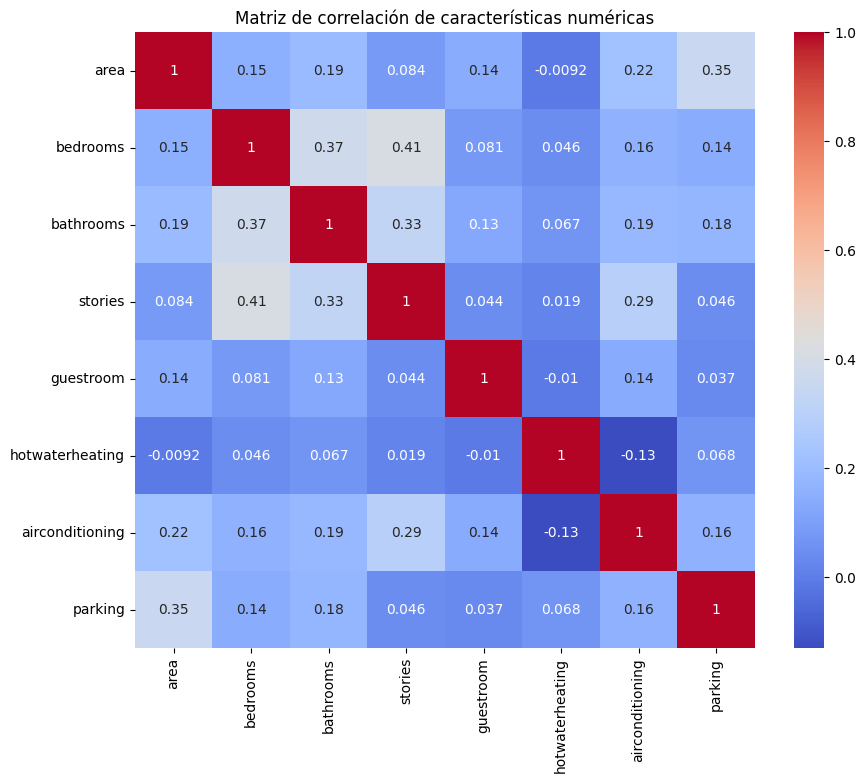


Tipos de Datos:
price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
guestroom          int64
hotwaterheating    int64
airconditioning    int64
parking            int64
dtype: object

Número de filas duplicadas: 0

constantes de columnas:


[]

In [16]:
# Identificamoes las variables numéricas y categóricas
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# datos de calidad del dataset
# Imprimimos un informe de calidad de los datos
print("Data Quality Report")
print("-" * 20)

# valores faltantes
print("\nValores Faltanes:")
print(df.isnull().sum())

# estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Detección de valores atípicos mediante diagramas de caja para características numéricas
print("\nDetección de valores atípicos (Box Plots):")
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Compruebamos si hay valores extraños en las características categóricas (si corresponde)
print("\nValores extraños en características categóricas:")
for col in categorical_features:
    print(f"\nUnique values for {col}:")
    print(df[col].value_counts())


# Correlaciones entre características numéricas
print("\nMatriz de Correlación:")
# Calculamos la matriz de correlación
correlation_matrix = df[numerical_features].corr()  # solo características numéricas
# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de características numéricas")
plt.show()


# Análisis de tipos de datos
print("\nTipos de Datos:")
print(df.dtypes)


# chequeos adicionales
# Comprobamos si hay filas duplicadas
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# chequeamos si hay columnas con solo un valor único (constantes)
print("\nconstantes de columnas:")
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
constant_cols



# **Pregunta 8: Genera un modelo de regresión lineal**

In [ ]:
# Convertimos las variables categóricas a valores numéricos
df['guestroom'] = df['guestroom'].map({'no': 0, 'yes': 1})
df['hotwaterheating'] = df['hotwaterheating'].map({'no': 0, 'yes': 1})
df['airconditioning'] = df['airconditioning'].map({'no': 0, 'yes': 1})

# Definimos las variables predictoras y objetivo
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']]
y = df['price']

# Dividimos los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos la instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Mostramos coeficientes y desempeño del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("Score en conjunto de prueba:", model.score(X_test, y_test))



Coeficientes: [2.67674095e+02 1.23387337e+05 1.09893645e+06 3.59272293e+05
 5.81768639e+05 6.63421096e+05 8.81775436e+05 2.82934838e+05]
Intercepto: 327662.93363499176
Score en conjunto de prueba: 0.6119372009958433


# **Pregunta 9**
## a)

Error cuadrático medio (MSE): 1961490677565.4883
Coeficiente de determinación (R²): 0.6119372009958433


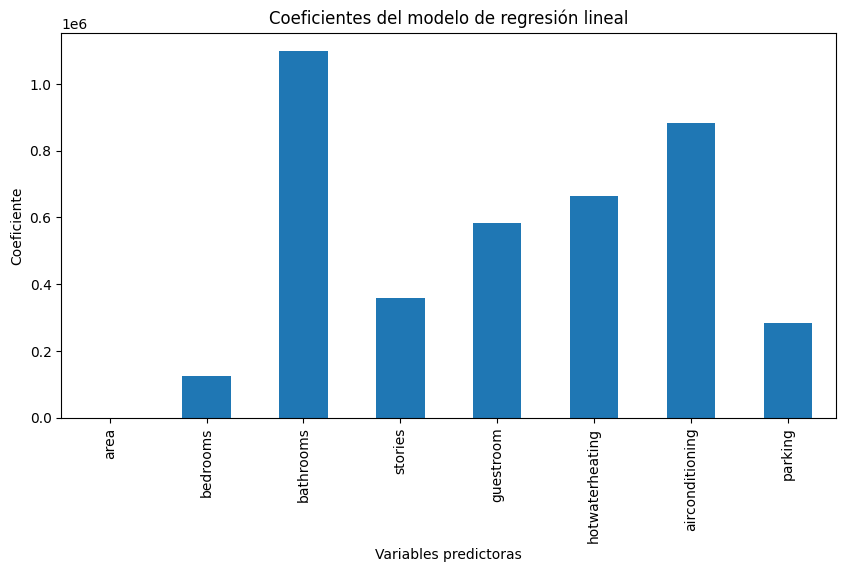

In [17]:
# Cargamos los datos
df = pd.read_excel("data-housing.xlsx")

# Convertimos las variables categóricas a valores numéricos
df['guestroom'] = df['guestroom'].map({'no': 0, 'yes': 1})
df['hotwaterheating'] = df['hotwaterheating'].map({'no': 0, 'yes': 1})
df['airconditioning'] = df['airconditioning'].map({'no': 0, 'yes': 1})

# Definimos las variables predictoras y objetivo
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']]
y = df['price']

# Dividimos los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos la instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecimos los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos las métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Graficamos los coeficientes del modelo
coeficientes = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(10, 5))
coeficientes.plot(kind="bar")
plt.title("Coeficientes del modelo de regresión lineal")
plt.xlabel("Variables predictoras")
plt.ylabel("Coeficiente")
plt.show()

## b)

Error cuadrático medio (MSE): 1961490677565.4883
Coeficiente de determinación (R²): 0.6119372009958433


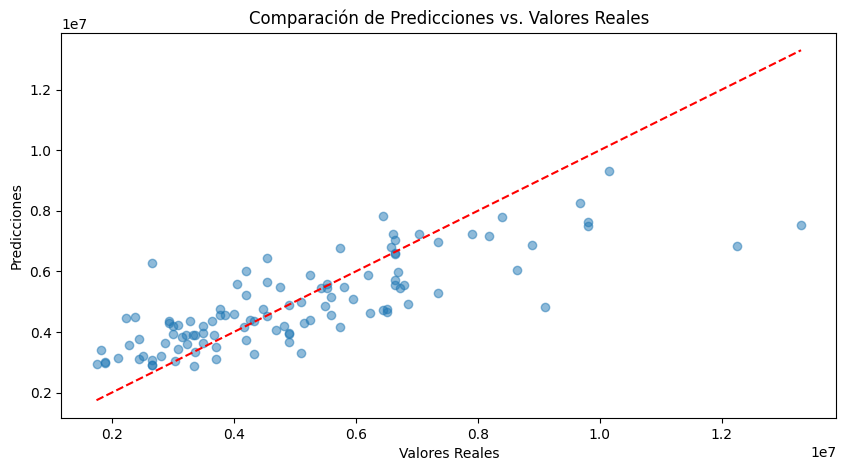

In [18]:
# Cargamos los datos
df = pd.read_excel("data-housing.xlsx")

# Convertimos las variables categóricas a valores numéricos
df['guestroom'] = df['guestroom'].map({'no': 0, 'yes': 1})
df['hotwaterheating'] = df['hotwaterheating'].map({'no': 0, 'yes': 1})
df['airconditioning'] = df['airconditioning'].map({'no': 0, 'yes': 1})

# Definimos las variables predictoras y objetivo
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']]
y = df['price']

# Dividimos los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos la instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos las  predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#imprimimos las métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Comparamos las predicciones con valores reales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle="--", color="red")  # Línea de referencia
plt.show()